In [1]:
# mount google colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [18]:
# importing required libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.applications.xception import Xception
from keras.models import load_model
from pickle import load
import numpy as np
from PIL import Image

# setting image path to the one we want to test out
img_path = '/content/drive/MyDrive/Techathlon/images/Dog.jpeg'


# extract features from the image
def extract_features(filename, model):
        try:
            image = Image.open(filename)
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        
        # some image pre-processing to satisfy model requirements
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0

        # pass the pre-processed image to the model for prediction
        feature = model.predict(image)
        return feature


# extract word of the specified index
def word_for_id(integer, tokenizer):
 for word, index in tokenizer.word_index.items():
     if index == integer:
         return word
 return None


# generate description of a photo
def generate_desc(model, tokenizer, photo, max_length):

    # 'start' token for an image
    in_text = 'start'

    # loop only 'max_len' number of times since that is the max allowed desc length
    for i in range(max_length):

        # convert text to sequences
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        
        # pad to the max length of descriptions
        sequence = pad_sequences([sequence], maxlen=max_length)
        
        # generate prediction
        pred = model.predict([photo,sequence], verbose=0)
        
        # select the prediction with the highest argument value
        pred = np.argmax(pred)
        
        # extract the word from the index predicted
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        
        # append the word to the predicted description
        in_text += ' ' + word
        if word == 'end':
            break
    
    return in_text


# driver of the program
if __name__ == "__main__":
  max_length = 32
  tokenizer = load(open("/content/drive/MyDrive/Techathlon/models/tokenizer.p","rb"))

  # using pre-trained weights here
  model = load_model('/content/drive/MyDrive/Techathlon/models/models/model_9.h5')

  # loading Xception model
  xception_model = Xception(include_top=False, pooling="avg")

white dog is running through the grass 



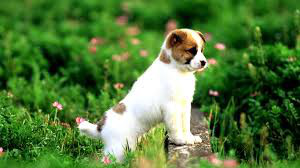

In [16]:
# extracting features from the image
photo = extract_features(img_path, xception_model)
img = Image.open(img_path)
  # generate description for the model
description = generate_desc(model, tokenizer, photo, max_length)
print(description[6:-3])
print()
img